In [9]:
import pandas as pd

In [10]:
vaccine=pd.read_csv('covid_vaccine_statewise.csv')

In [11]:
covid=pd.read_csv('covid_19_india.csv')

In [12]:
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [13]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [14]:
covid.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'], inplace=True, axis=1)

In [15]:
covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [16]:
covid['Date']= pd.to_datetime(covid['Date'], format="%Y,-%m-%d")

ValueError: time data "2020-01-30" doesn't match format "%Y,-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [17]:
covid.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [18]:
covid['Active_cases']=covid['Confirmed']-(covid['Cured']+covid['Deaths'])

In [19]:
covid.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [20]:
statewise=pd.pivot_table(covid, values= ['Confirmed','Deaths', 'Cured'], 
                         index='State/UnionTerritory', aggfunc=max)

In [21]:
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


In [22]:
statewise['Recovery Rate']= statewise['Cured']*100/statewise['Confirmed']

In [23]:
statewise['mortality Rate']= statewise['Deaths']*100/statewise['Confirmed']

In [24]:
statewise=statewise.sort_values(by='Confirmed', ascending=False)

In [25]:
statewise.style.background_gradient(cmap='cubehelix')

,Confirmed,Cured,Deaths,Recovery Rate,mortality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [32]:
top_10_active_cases= covid.groupby(by='State/UnionTerritory').max()[['Active_cases', 'Date']].sort_values(by=['Active_cases'], ascending=False).reset_index()

In [33]:
fig= plt.figure(figsize=(16,9))

<IPython.core.display.Javascript object>

<Figure size 1600x900 with 0 Axes>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Top 10 States with mot active cases in India')

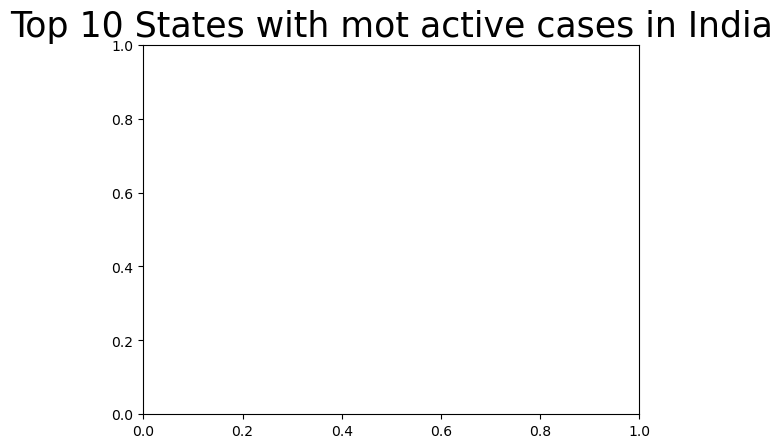

In [34]:
plt.title("Top 10 States with mot active cases in India", size=25)

<IPython.core.display.Javascript object>

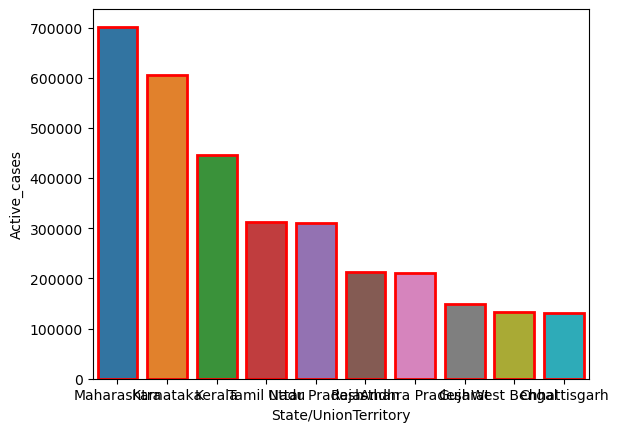

In [36]:
ax=sns.barplot(data=top_10_active_cases.iloc[:10], y="Active_cases", x='State/UnionTerritory', linewidth=2, edgecolor='red')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

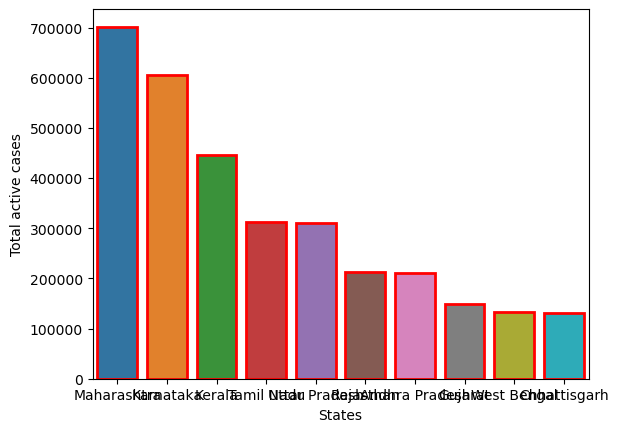

In [38]:
top_10_active_cases= covid.groupby(by='State/UnionTerritory').max()[['Active_cases', 'Date']].sort_values(by=['Active_cases'], ascending=False).reset_index()
ax=sns.barplot(data=top_10_active_cases.iloc[:10], y="Active_cases", x='State/UnionTerritory', linewidth=2, edgecolor='red')
plt.xlabel("States")
plt.ylabel("Total active cases")
plt.show()

In [40]:
# top states with highest deaths 

top_10_deaths= covid.groupby(by='State/UnionTerritory'.max()['Deaths'],ascending =False).reset_index()

fig=plt.figure(figsize=(18,5))
plt.title("Top 10 states with most deaths", size=25)
ax= sns.barplot(data=top_10_deaths.iloc[:12], y="Deaths", x="State/UnionTerritory", linewidth=2, edgecolor='Black')    
plt.xlabel("States")    
plt.ylabel("Total Death Cases")
plt.show()

AttributeError: 'str' object has no attribute 'max'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

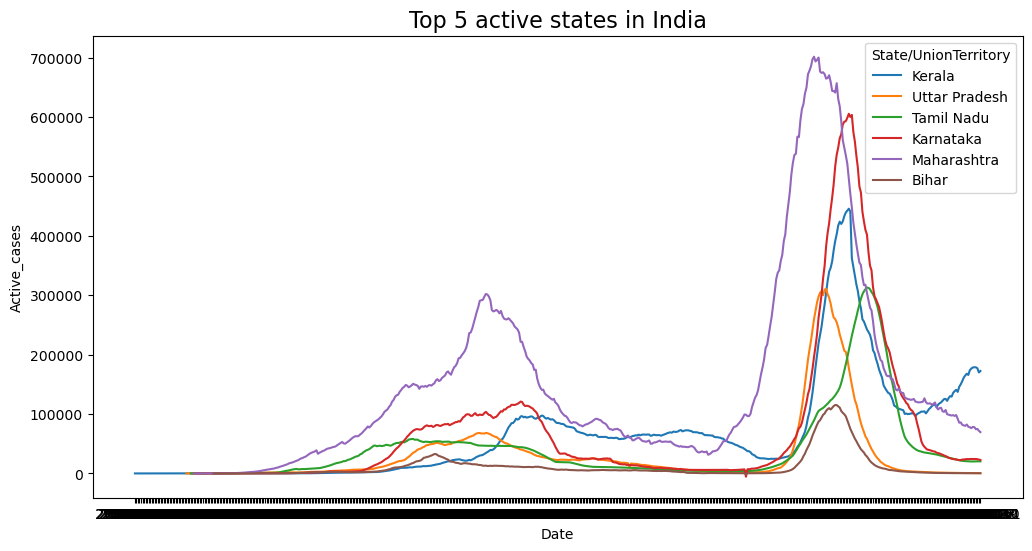

In [44]:
fig = plt.figure(figsize=(12, 6))

ax = sns.lineplot(data=covid[covid['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Bihar', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])], x='Date', y='Active_cases', hue='State/UnionTerritory')
ax.set_title("Top 5 active states in India", size=16)

plt.show()

In [45]:
vaccine.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
